In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sprint = pd.read_csv('sprint_results.csv', encoding="utf-8")
results = pd.read_csv('results.csv', encoding="utf-8")
sprint.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [2]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [3]:
results = results[['raceId', 'driverId', 'points', 'laps', 'milliseconds']]
results.rename(columns = {'milliseconds': 'race_time'}, inplace = True)
results.rename(columns = {'points': 'race_points'}, inplace = True)
results.rename(columns = {'laps': 'race_laps'}, inplace = True)

# remove missing values
results.replace('\\N', np.nan, inplace=True)
results.dropna(inplace=True)
results.head()

,raceId,driverId,race_points,race_laps,race_time
0,18,1,10.0,58,5690616
1,18,2,8.0,58,5696094
2,18,3,6.0,58,5698779
3,18,4,5.0,58,5707797
4,18,5,4.0,58,5708630


In [4]:
print(results['race_time'].dtype)
results['race_time'] = results['race_time'].astype(int)
print(results['race_time'].dtype)

object
int64


In [5]:
# remove missing values
sprint.replace('\\N', np.nan, inplace=True)
sprint.dropna(inplace=True)
sprint.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [6]:
print(sprint['milliseconds'].dtype)
sprint['milliseconds'] = sprint['milliseconds'].astype(int)
print(sprint['milliseconds'].dtype)

object
int64


In [7]:
sprint = sprint[['raceId', 'driverId', 'constructorId', 'points', 'laps', 'milliseconds']]
sprint.rename(columns = {'milliseconds': 'sprint_time'}, inplace = True)
sprint.rename(columns = {'points': 'sprint_points'}, inplace = True)
sprint.rename(columns = {'laps': 'sprint_laps'}, inplace = True)
sprint.describe()

,raceId,driverId,constructorId,sprint_points,sprint_laps,sprint_time
count,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,1087.875676,721.989189,94.605405,1.459459,19.908108,1.789043e+06
std,18.519399,290.402157,87.818618,2.418167,4.041522,1.766217e+05
min,1061.000000,1.000000,1.000000,0.000000,11.000000,1.498433e+06
25%,1071.000000,822.000000,6.000000,0.000000,17.000000,1.627616e+06
50%,1084.000000,840.000000,51.000000,0.000000,21.000000,1.811239e+06
75%,1107.000000,847.000000,210.000000,2.000000,24.000000,1.881026e+06
max,1115.000000,858.000000,214.000000,8.000000,24.000000,2.128165e+06


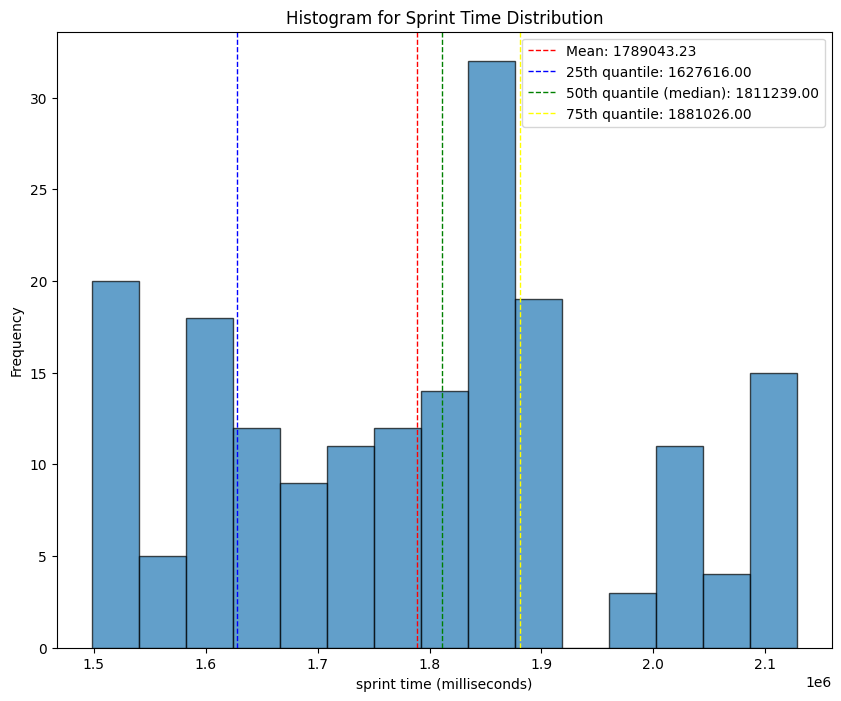

In [8]:
plt.figure(figsize = (10, 8))
plt.hist(sprint['sprint_time'], bins = 15, edgecolor = 'black', alpha = 0.7)

# Adding mean and quantiles
mean_val = sprint['sprint_time'].mean()
quantile_25 = sprint['sprint_time'].quantile(0.25)
quantile_50 = sprint['sprint_time'].quantile(0.50)
quantile_75 = sprint['sprint_time'].quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='dashed', 
linewidth=1, label=f"Mean: {mean_val:.2f}")
plt.axvline(quantile_25, color='blue', linestyle='dashed', 
linewidth=1, label=f"25th quantile: {quantile_25:.2f}")
plt.axvline(quantile_50, color='green', linestyle='dashed', 
linewidth=1, label=f"50th quantile (median): {quantile_50:.2f}")
plt.axvline(quantile_75, color='yellow', linestyle='dashed', 
linewidth=1, label=f"75th quantile: {quantile_75:.2f}")

plt.title(f'Histogram for Sprint Time Distribution')
plt.xlabel('sprint time (milliseconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [9]:
sprint_race = pd.merge(sprint, results, on = ['raceId', 'driverId'], how = 'left')
sprint_race.replace('\\N', np.nan, inplace=True)
sprint_race.dropna(inplace=True)

sprint_race.head()

,raceId,driverId,constructorId,sprint_points,sprint_laps,sprint_time,race_points,race_laps,race_time
1,1061,1,131,2,17,1539856,25.0,52.0,7103284.0
2,1061,822,131,1,17,1545928,15.0,52.0,7114409.0
3,1061,844,6,0,17,1549704,18.0,52.0,7107155.0
4,1061,846,1,0,17,1562537,12.0,52.0,7131857.0
5,1061,817,1,0,17,1569385,10.0,52.0,7145908.0


In [10]:
sprint_race.describe()

,raceId,driverId,constructorId,sprint_points,sprint_laps,sprint_time,race_points,race_laps,race_time
count,113.000000,113.000000,113.000000,113.000000,113.000000,1.130000e+02,113.000000,113.000000,1.130000e+02
mean,1090.495575,712.787611,86.584071,1.929204,19.044248,1.790555e+06,8.389381,58.460177,5.531461e+06
std,19.130251,299.017930,83.447987,2.721334,4.283251,1.894851e+05,7.988198,9.936437,6.254821e+05
min,1061.000000,1.000000,1.000000,0.000000,11.000000,1.498433e+06,0.000000,44.000000,4.914365e+06
25%,1071.000000,822.000000,6.000000,0.000000,17.000000,1.591993e+06,1.000000,51.000000,5.053521e+06
50%,1095.000000,839.000000,51.000000,0.000000,19.000000,1.821801e+06,8.000000,57.000000,5.341468e+06
75%,1107.000000,846.000000,131.000000,4.000000,24.000000,1.879578e+06,15.000000,71.000000,5.652165e+06
max,1115.000000,858.000000,214.000000,8.000000,24.000000,2.128165e+06,26.000000,71.000000,7.188611e+06
